In [2]:
from graphviz import Digraph, Graph
from IPython.core.display import display

In [18]:
# binary trees: how can we use them for search?
#3 in SOME_SET
#SOME_DICT["key"]

class Node:
    def __init__(self, name):
        self.name = name # key
        # self.value = ... # for a dict
        self.left = None
        self.right = None
        
    def draw_edges(self, g):
        g.node(str(self.name))
        if self.left:
            g.edge(str(self.name), str(self.left.name), label="L")
            self.left.draw_edges(g)
        if self.right:
            g.edge(str(self.name), str(self.right.name), label="R")
            self.right.draw_edges(g)

    def draw_graph(self):
        g = Graph()
        self.draw_edges(g)
        return g
    
    def _repr_svg_(self): # svg is an image format
        g = self.draw_graph()
        return g._repr_svg_()
    
    # for dict:
    # __getitem__ and __setitem__ 
    
    def __contains__(self, x):
        #print(f"Searching for {x} in subtree:")
        #display(self)
        if self.name == x:
            return True
        if x < self.name and self.left and self.left.__contains__(x):
            return True
        if x > self.name and self.right and self.right.__contains__(x):
            return True
        return False

    def add(self, x):
        if x < self.name:
            # go LEFT!
            if self.left == None:
                self.left = Node(x)
            else:
                self.left.add(x)
        elif x > self.name:
            # go RIGHT!
            if self.right == None:
                self.right = Node(x)
            else:
                self.right.add(x)
            
# BST rule:
# each node's value is bigger than all those in it's left subtree, and
# each node's value is small than all those in it's right subtree
values = [5,3,7,11,10,8]
root = Node(values[0])
for v in values[1:]:
    root.add(v)
#root.__contains__(7)
6 in root

False

In [ ]:
# before BST (regular BT), search was O(N), where N was the number of nodes
# with BSTs, search is still O(N), but now N is the height of the tree
# with balanced BSTs (minimal possible height), search is O(log(N)) where N is the number of nodes

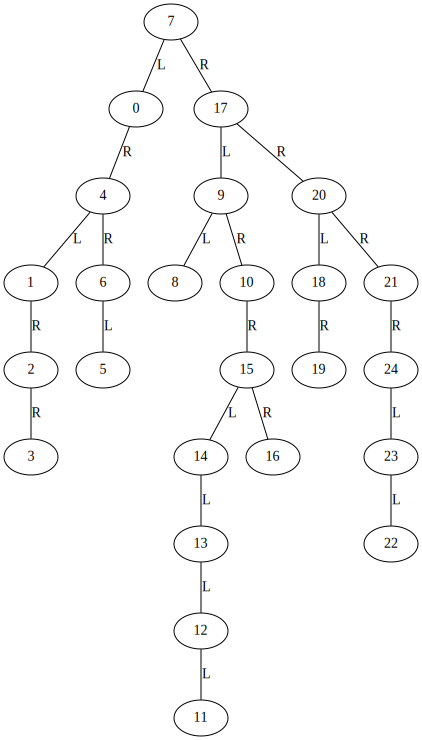

In [23]:
import random
nums = list(range(25))
#nums.sort()
random.shuffle(nums)
root = Node(nums[0])
for v in nums[1:]:
    root.add(v)
root